In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

1. 두 개의 target 단어 세트 X, Y와 두 개의 attribute 단어 세트 A, B를 정의
2. 단어세트를 정할때는 각각의 세트의 크기는 같아야함

In [4]:
# 임의의 임베딩 결과를 입력
target_X = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_Y = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_A = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_B = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}    

In [5]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [6]:
A = np.array([v for v in attribute_A.values()])
B = np.array([v for v in attribute_B.values()])
print(A)
print(B)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


In [7]:
# ('장미', A,B)계산해보기
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

print(s(target_X['장미'], A, B))

0.6457646122337399


* 양수가 나왔으므로 '장미'는 attribute_B(불쾌)보다 attribute_A(유쾌)에 더 가까움
* attribut_B의 값들은 음수

In [8]:
print(s(target_Y['거미'], A, B))

-0.794002342033094


In [9]:
# target X와 attribute_A, B 간의 평균값 구해보기
print(s(X, A, B))
print(round(np.mean(s(X, A, B)), 3))

[0.29551989 0.51723181 0.26499096 0.50924109]
0.397


In [10]:
# target Y와 attribute_A, B 간의 평균값 구해보기
print(s(Y, A, B))
print(round(np.mean(s(Y, A, B)), 3))

[-0.44713039 -0.28310853 -0.33144878 -0.26030641]
-0.33


In [11]:
# WEAT score의 수식 전체를 코드로 표현하기
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

1.932


* WEAT score 가 매우 높게 나옴
* 즉, 꽃은 유쾌한 단어와 가깝고 곤충은 불쾌한 단어와 가깝다는 것을 수치적으로 확인할 수 있다

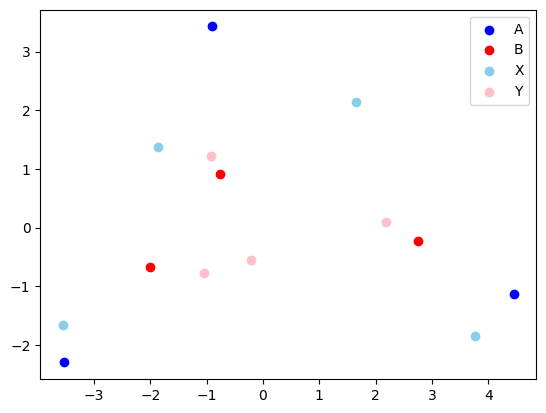

In [14]:
# 시각화
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')
plt.legend()
plt.show()

* A는 X와 가깝고 B는 Y와 가깝다는것을 시각적으로 확인할 수 있음

In [23]:
f = open('synopsis.txt', 'r', encoding='utf8')
for i in range(20):
        print(f.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [26]:
# 품사가 명사인 경우만 남겨 tokenized라는 변수명으로 저장
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open('synopsis.txt', 'r', encoding='utf8') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [27]:
print(len(tokenized))

71156


#### 추출된 결과로 embedding model 만들기

In [28]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

[('작품', 0.8736620545387268),
 ('다큐멘터리', 0.8318464159965515),
 ('드라마', 0.8151986598968506),
 ('영화로', 0.7809855341911316),
 ('형식', 0.7749606966972351),
 ('소재', 0.7661241888999939),
 ('코미디', 0.7655311822891235),
 ('에마데딘', 0.7634376287460327),
 ('감동', 0.7599084377288818),
 ('주제', 0.7493578195571899)]

In [29]:
model.wv.most_similar(positive=['사랑'])

[('애정', 0.6997047662734985),
 ('행복', 0.6989068388938904),
 ('만남', 0.693990170955658),
 ('첫사랑', 0.6921367049217224),
 ('이별', 0.6894645690917969),
 ('아르튬', 0.6802223324775696),
 ('진심', 0.6798796653747559),
 ('가슴', 0.6789758801460266),
 ('연애', 0.6729995608329773),
 ('존경심', 0.6602395176887512)]

In [30]:
model.wv.most_similar(positive=['연극'])

[('영화감독', 0.9041674137115479),
 ('시나리오', 0.8789856433868408),
 ('팬', 0.8743436336517334),
 ('대본', 0.8714762926101685),
 ('각색', 0.870575487613678),
 ('배우', 0.8693177700042725),
 ('예술가', 0.8646193742752075),
 ('오페라', 0.8644236922264099),
 ('감성', 0.8637799024581909),
 ('캐스팅', 0.8619714975357056)]

In [39]:
model.wv.most_similar(positive=['우정'])

[('우정은', 0.855998158454895),
 ('교감', 0.8423915505409241),
 ('로맨스', 0.8187311291694641),
 ('감정', 0.8181557655334473),
 ('허문', 0.8131846189498901),
 ('남녀', 0.7899187207221985),
 ('삼각관계', 0.7851055860519409),
 ('갈등', 0.7832767367362976),
 ('청춘', 0.7813847661018372),
 ('화해', 0.7784368991851807)]